### 다항 회귀와 과대적합/과서적합 이해

- 다항회귀를 비선형 회귀로 혼동하기 쉽지만 다항회귀는 선형회귀이다.
- 선형과 비선형 회귀를 나누는 기준은 회귀 계수가 선형/비선형인지에 따른 것이지 독립변수의 선형/비선현 여부와는 무관하다

- 아쉽지만 사이킷런은 다항 회귀를 위한 클래스를 명시적으로 제공하지 않는다.
- 대신에 다항 회귀 역시 선형 회귀이기 때문에 비선형 함수를 선형 모델에 적용시키는 방법을 사용해 구현한다.
- 사이킷런은 PolynomialDeatures 클래스를 통해 피처를 Polynomial피처로 변환한다.
- PolynomiaFeatures클래스는 degree 파라미터를 통해 입력받은 단항식 피처를 degree에 해당하는 다항식 피처로 변환한다.

In [1]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

# 다항식으로 변환한 단항식 생성 , [[0,1],[2,3]]의 2x2 행렬 생성
X = np.arange(4).reshape(2,2)
print('일차 단항식 계수 피처 : \n',X)

# degree = 2인 2차 다항식으로 변환하기 위해 PolynomialFeatures를 이용해 변환
poly = PolynomialFeatures(degree=2)
poly.fit(X)
poly_ftr = poly.transform(X)
print('변환된 2차 다항식 계수 피처 : \n',poly_ftr)

일차 단항식 계수 피처 : 
 [[0 1]
 [2 3]]
변환된 2차 다항식 계수 피처 : 
 [[1. 0. 1. 0. 0. 1.]
 [1. 2. 3. 4. 6. 9.]]


- 3차 다항식 결정값을 구하는 함수 polynomial_func(X) 생성. 즉 회귀식은 결정값 y=1+2x_1+3x_1^2+4x_2^3

In [2]:
from sklearn.linear_model import LinearRegression

In [3]:
def polynomial_func(X):
    y = 1 + 2*X[:,0] + 3+X[:,0]**2 + 4*X[:,1]**3
    return y
    
X = np.arange(0,4).reshape(2,2)

print('일차 단항식 계수 feature : \n', X)
y = polynomial_func(X)
print('삼차 다항식 결정값 : \n',y)

# 3차 다항식 변환
poly_ftr = PolynomialFeatures(degree=3).fit_transform(X)
print('3차 다항식 계숙 feature : \n', poly_ftr)

# Linear Regression에 3차 다항식 계수 feature와 3차 다항식 결정값으로 학습 후 회귀 계수 확인
model = LinearRegression()
model.fit(poly_ftr,y)
print('Polynomial 회귀 계수 \n', np.round(model.coef_,2))
print('Polynomial 회귀 Shape : ', model.coef_.shape)



일차 단항식 계수 feature : 
 [[0 1]
 [2 3]]
삼차 다항식 결정값 : 
 [  8 120]
3차 다항식 계숙 feature : 
 [[ 1.  0.  1.  0.  0.  1.  0.  0.  0.  1.]
 [ 1.  2.  3.  4.  6.  9.  8. 12. 18. 27.]]
Polynomial 회귀 계수 
 [0.   0.17 0.17 0.34 0.5  0.67 0.67 1.01 1.51 2.19]
Polynomial 회귀 Shape :  (10,)


- 3차 다항식 계수의 피처값 3차 다항식 결정값으로 학습
- 사이킷런 파이프라인(Pipeline)을 이용하여 3차 다항회귀 학습
- 사이킷런의 Pipeline 객체는feature 엔지니어링 변환과 모델 학습/예측을 순차적으로 결합해줍니다.

In [5]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import numpy as np

def polynomial_func(X):
    y = 1 + 2*X[:,0] + 3*X[:,0]**2 + 4*X[:,1]**3 
    return y

# Pipeline 객체로 Streamline 하게 Polynomial Feature변환과 Linear Regression을 연결
model = Pipeline([('poly', PolynomialFeatures(degree=3)),
                  ('linear', LinearRegression())])
X = np.arange(4).reshape(2,2)
y = polynomial_func(X)

model = model.fit(X, y)
print('Polynomial 회귀 계수\n', np.round(model.named_steps['linear'].coef_, 2))

Polynomial 회귀 계수
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]


- 다항 회귀를 이용한 보스턴 주택가격 예측

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.datasets import load_boston
import numpy as np
import pandas as pd

# boston 데이타셋 로드
boston = load_boston()

# boston 데이타셋 DataFrame 변환 
bostonDF = pd.DataFrame(boston.data , columns = boston.feature_names)

# boston dataset의 target array는 주택 가격임. 이를 PRICE 컬럼으로 DataFrame에 추가함. 
bostonDF['PRICE'] = boston.target
print('Boston 데이타셋 크기 :',bostonDF.shape)

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'],axis=1,inplace=False)


X_train , X_test , y_train , y_test = train_test_split(X_data , y_target ,test_size=0.3, random_state=156)

## Pipeline을 이용하여 PolynomialFeatures 변환과 LinearRegression 적용을 순차적으로 결합. 
p_model = Pipeline([('poly', PolynomialFeatures(degree=3, include_bias=False)),
                  ('linear', LinearRegression())])

p_model.fit(X_train, y_train)
y_preds = p_model.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)


print('MSE : {0:.3f} , RMSE : {1:.3F}'.format(mse , rmse))
print('Variance score : {0:.3f}'.format(r2_score(y_test, y_preds)))


Boston 데이타셋 크기 : (506, 14)
MSE : 79625.593 , RMSE : 282.180
Variance score : -1116.598


In [9]:
X_train_poly = PolynomialFeatures(degree=2, include_bias=False).fit_transform(X_train,y_train)
X_train_poly.shape, X_train.shape

((354, 104), (354, 13))

#### Polynomial Regression을 이용한 Undeffitting, Overfitting 이해


- 다항식의 차수가 높아질수록 매우 복잡한 피처 간의 관계까지 모델링이 가능하다.
- 다항 회귀의 차수(degree)를 높일수록 학습 데이터에만 너무 맞춘 학습이 이뤄져서 정작 테스테 데이터 환경에서는 오히려 예측정확도가 떨어진다.
- 즉, 차수가 높아질수록 과적합의 문제가 크게 발생한다.

- cosine 곡선에 약간의 Noise 변동값을 더하여 실제값 곡선을 만듬

In [10]:
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
%matplotlib inline

# random 값으로 구성된 xrkqtdp eogo Cosine 변환값을 반환
def true_fun(X):
    return np.cos(1.5 * np.pi * X)

# X는 0부터 1까지 30개의 rnadom 값을 순서대로 sampling 한 데이터입니다.
np.random.seed(0)
n_samples = 30
X = np.sort(np.random.rand(n_samples))

# y 값은 cosine 기반의 true_fun()에서 약간의 Noise변동값을 더한 값입니다.
y = true_fun(X) + np.random.randn(n_samples) * 0.1

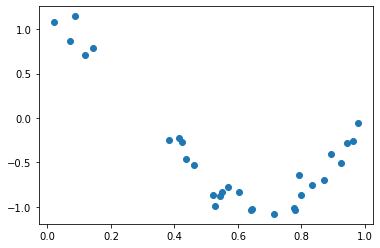

In [11]:
plt.scatter(X,y)


Degree 1 회귀 계수는 [-2.] 입니다.
Degree 1 MSE 는 0.41 입니다.

Degree 4 회귀 계수는 [  0. -18.  24.  -7.] 입니다.
Degree 4 MSE 는 0.04 입니다.

Degree 15 회귀 계수는 [-2.98300000e+03  1.03900000e+05 -1.87417100e+06  2.03717220e+07
 -1.44873987e+08  7.09318780e+08 -2.47066977e+09  6.24564048e+09
 -1.15677067e+10  1.56895696e+10 -1.54006776e+10  1.06457788e+10
 -4.91379977e+09  1.35920330e+09 -1.70381654e+08] 입니다.
Degree 15 MSE 는 182815433.48 입니다.


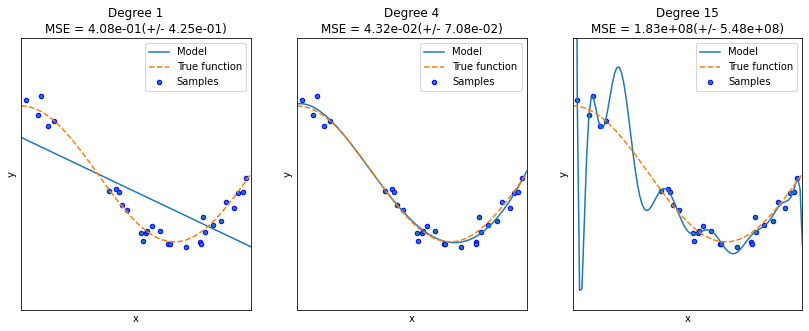

In [15]:
plt.figure(figsize=(14, 5))
degrees = [1, 4, 15]

# 다항 회귀의 차수(degree)를 1, 4, 15로 각각 변화시키면서 비교합니다. 
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())
    
    # 개별 degree별로 Polynomial 변환합니다. 
    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X.reshape(-1, 1), y)
    
    # 교차 검증으로 다항 회귀를 평가합니다. 
    scores = cross_val_score(pipeline, X.reshape(-1,1), y,scoring="neg_mean_squared_error", cv=10)
    coefficients = pipeline.named_steps['linear_regression'].coef_
    print('\nDegree {0} 회귀 계수는 {1} 입니다.'.format(degrees[i], np.round(coefficients),2))
    print('Degree {0} MSE 는 {1:.2f} 입니다.'.format(degrees[i] , -1*np.mean(scores)))
    
    # 0 부터 1까지 테스트 데이터 세트를 100개로 나눠 예측을 수행합니다. 
    # 테스트 데이터 세트에 회귀 예측을 수행하고 예측 곡선과 실제 곡선을 그려서 비교합니다.  
    X_test = np.linspace(0, 1, 100)
    # 예측값 곡선
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model") 
    # 실제 값 곡선
    plt.plot(X_test, true_fun(X_test), '--', label="True function")
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
    
    plt.xlabel("x"); plt.ylabel("y"); plt.xlim((0, 1)); plt.ylim((-2, 2)); plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(degrees[i], -scores.mean(), scores.std()))

plt.show()

- 실선으로 표현된 예측 곡선은 다항회귀 예측곡선입니다.
- 점선으로 표현된 곡서은 실제 데이터세트 X,y의 코사인 곡선입니다.

- 편향이 높으면 분산은 낮아지고(과소적합)
- 분산이 높으면 편향이 낮아집니다(과대적합)

+ 편향을 낮추고 분산을 높이면서 전체 오류가 가장 낮아지는 골디락스 지점을 통과하면서 분산을 지속적으로 높이면 전체 오류값이 오히려 증가하면서 예측 성능이 다시 저하됩니다.
- 높은 편향/낮은 분산에서 과소적합되기 쉬우며 
- 낮은 편향/높은 분산에서 과적합되기 쉽습니다.

+ 편향과 분산이 서로 트레이드오프를 이루면서 오류 Cost값이 최대로 낮아지는 모델을 구축하는 것이 가장 효율적인 머신러닝 예측 모델을 만드는 방법입니다.